In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick 

#Style Settings
sns.set(rc = {'axes.facecolor':'white'
              ,'figure.figsize':(12,8)
              ,'figure.facecolor':'white'
              ,'axes.edgecolor': '#C4C4BF'
              ,'lines.linewidth':3
              ,'axes.titlesize':26
              ,'axes.labelsize':16
              ,'axes.labelcolor':'black'
              ,'grid.color': '#EEEEED'
              ,'text.color':'black'
              ,'xtick.color':'black'
              ,'ytick.color':'black'
              ,'ytick.labelsize':14
              ,'xtick.labelsize':14
              ,'legend.fontsize':12
              ,'axes.linewidth':2
              ,'grid.linestyle': '--'},
            font = 'Segoe UI')

In [24]:
training_data_df = pd.read_csv('../data/train.csv')
train, test = train_test_split(training_data_df, test_size=0.2)


X_train = train.drop(columns= ['label']).to_numpy().T 
y_train = train['label'].to_numpy()

X_test = test.drop(columns= ['label']).to_numpy().T 
y_test = test['label'].to_numpy()

# Create an instance of StandardScaler
scaler = StandardScaler()

# Normalize the matrix X column-wise
normalized_X = scaler.fit_transform(X_train)

In [3]:
class neural_network:



    def __init__(self, hidden_layers: int, node_counts: list):

        # Number of hidden layers 
        self.hidden_layers = hidden_layers
        if type(self.hidden_layers) != int:
            raise ValueError('hidden_layers must be an integer')
        
        # Number of nodes in each hidden layer
        self.node_counts = node_counts
        if type(self.node_counts) != list:
            raise ValueError('node_counts must be a list with length = hidden_layers')
        

        # Check if length of nodes_array matches the number of hidden_layers
        if hidden_layers != len(node_counts):
            raise ValueError('Number of hidden layers must match number of node counts')
        

    # Activation Functions

    # Relu
    def relu(self,x):
        return np.maximum(0,x)
    
    # Relu Derivative
    def relu_deriv(self,Z):
        return Z > 0

    # Leaky Relu
    def leaky_relu(self,x):
        return np.where(x > 0, x, x * 0.01)

    # Leaky Relu Derivative
    def leaky_relu_deriv(self,x):
        return np.where(x > 0, 1, 0.01)
        
    # Tanh
    def tanh(self,x):
        return np.tanh(x)

    def sech(self,x):
        return 1 / np.cosh(x)

    # Tanh Derivative
    def tanh_deriv(self,x ):

        return self.sech(x)**2
        
    # Sigmoid
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))

    # Sigmoid Derivative
    def sigmoid_deriv(self,x):

        return (self.sigmoid(x)) * (1-self.sigmoid(x))
    
    # Softmax function for converting last Z matrix to a probability vector
    def softmax(self,x):
        return np.exp(x) / np.sum(np.exp(x),axis = 0)
    
    # One hot encoding function for classification for target variable
    def ohe(self,y):
    
        one_hot_Y = np.zeros(shape = (y.size, y.max() + 1))
        one_hot_Y[np.arange(y.size), y] = 1
        one_hot_Y = one_hot_Y.T
        return one_hot_Y
    
    # Defining Loss Function
    def loss(self,pred, test):

        return ((pred - self.ohe(test))**2).mean()

    # Method for generating predictions. Taking the index with the largest activation which will correspond to the digit prediction
    def get_predictions(self,A2):
        return np.argmax(A2, 0)

    # Method for getting accuracy
    def get_accuracy(self,predictions, Y):
        return np.sum(predictions == Y) / Y.size
    
    # Creating dictionary for activation functions
    
    activation_dict = {'relu':relu
                        ,'leaky_relu':leaky_relu
                        ,'tanh':tanh
                        ,'sigmoid':sigmoid}


    derivative_dict = {'relu':relu_deriv
                            ,'leaky_relu':leaky_relu_deriv
                            ,'tanh':tanh_deriv
                            ,'sigmoid':sigmoid}


    # Intializing Network Parameters
    def init_params(self,X,h1_n, h2_n, input_size):

        #  Weight Matrix centered at zero
        W1 = np.random.rand(h1_n,input_size) - 0.5
        W2 = np.random.rand(h2_n,h1_n) - 0.5

        # Initializing Biases Vectors
        b1 = np.zeros(shape = (h1_n,1))
        b2 = np.zeros(shape = (h2_n,1))

        return W1, b1, W2,b2 


    # Defining batch size, will be used for stochastic gradient descent
    def get_batch(self, X, y , batch_size):
        idx = np.random.randint(0,X.shape[1],batch_size)
        X_new = X.T[idx].T
        y_new = y[idx]

        return X_new, y_new

    # Forward Prop
    def forward_prop(self,X, W1, b1, W2, b2,activation = 'relu'):
        
        activation_function = self.activation_dict[activation]

        Z1 = W1.dot(X) + b1
        A1 = activation_function(self,Z1)

        Z2 = W2.dot(A1) +b2
        A2 = self.softmax(Z2)
  
        return Z1, A1, Z2, A2
    
    # Backward Propogation
    def back_prop (self,X, y, W1, Z1, A1, W2, A2,activation = 'relu'):
        m = X.shape[1]

        derivative_activation_function = self.derivative_dict[activation]
        dZ2 = A2 - self.ohe(y)
        dW2 = (1/m) * np.dot(dZ2,A1.T)
        db2 = (1/m) * np.sum(dZ2)

        dZ1 = np.dot(W2.T,dZ2) * derivative_activation_function(self,Z1)
        dW1 = (1/m) * np.dot(dZ1,X.T)
        db1 = (1/m) * np.sum(dZ1)


        return dW1, db1, dW2, db2
    
    # Param Update
    def updated_params(self,W1,dW1, W2,dW2, b1, db1, b2, db2, learning_rate = 1 ):
        W2 = W2 - (learning_rate * dW2)
        b2 = b2 - (learning_rate * db2)

        W1 = W1 - (learning_rate * dW1)
        b1 = b1 - (learning_rate * db1)
        return W1, b1, W2 , b2
    
    # Gradient Descent

    def fit(self,X,y,activation, learning_rate = 0.1, epochs = 1000 ,batch_size = 200):


        # Intializing Weights and Biases
        X_batch, y_batch  =  self.get_batch(X,y, batch_size)
        W1, b1, W2, b2 = self.init_params(X_batch,self.node_counts[0],self.node_counts[1],X_batch.shape[0])

        # Iterating Over Epoch Length
        accuracy_array = []
        for i in range(epochs):
            X_batch,y_batch = self.get_batch(X,y,batch_size)

            Z1, A1, Z2, A2 = self.forward_prop(X_batch, W1, b1, W2, b2, activation)
            dW1, db1, dW2, db2 = self.back_prop (X_batch, y_batch, W1, Z1, A1, W2, A2,activation)
            W1, b1, W2, b2 = self.updated_params(W1,dW1, W2,dW2, b1, db1, b2, db2, learning_rate = learning_rate)

            # Doing one more forward prop for last run
            if i == (epochs - 1):
                Z1, A1, Z2, A2 = self.forward_prop(X_batch, W1, b1, W2, b2,activation)
            predictions = self.get_predictions(A2)
            accuracy = self.get_accuracy(predictions, y_batch)

            if i % 10 == 0:
                    print(f"Iteration {i}: Accuracy: {accuracy} ")
                    accuracy_array.append(accuracy)



        
        self.W1 = W1
        self.b1 = b1
        self.W2 = W2 
        self.b2 = b2
        self.accuracy_array = accuracy_array


    def predict(self,X):
        a = self.forward_prop(X, self.W1, self.b1, self.W2, self.b2)
        return a[3].argmax(axis = 0)





In [4]:
lr = 0.1
batch_size = 500
e = 1_000

# Running NN
nn_tanh = neural_network(hidden_layers = 2,node_counts= [100,10] )
nn_tanh.fit(X = normalized_X, y = y_train , activation = 'tanh',learning_rate = lr, epochs = e,batch_size = batch_size)
tanh_acc = nn_tanh.accuracy_array

# Running NN
nn_relu = neural_network(hidden_layers = 2,node_counts= [100,10] )
nn_relu.fit(X = normalized_X, y = y_train , activation = 'relu',learning_rate = lr, epochs = e,batch_size = batch_size)
relu_acc = nn_relu.accuracy_array

# Running NN
nn_sigmoid = neural_network(hidden_layers = 2,node_counts= [100,10] )
nn_sigmoid.fit(X = normalized_X, y = y_train , activation = 'sigmoid',learning_rate = lr, epochs = e,batch_size = batch_size)
sigmoid_acc = nn_sigmoid.accuracy_array

# Running NN
nn_leaky_relu = neural_network(hidden_layers = 2,node_counts= [100,10] )
nn_leaky_relu.fit(X = normalized_X, y = y_train , activation = 'leaky_relu',learning_rate = 0.3, epochs = e,batch_size = batch_size)
leaky_relu_acc = nn_leaky_relu.accuracy_array

Iteration 0: Accuracy: 0.078 
Iteration 10: Accuracy: 0.332 
Iteration 20: Accuracy: 0.488 
Iteration 30: Accuracy: 0.608 
Iteration 40: Accuracy: 0.624 
Iteration 50: Accuracy: 0.644 
Iteration 60: Accuracy: 0.7 
Iteration 70: Accuracy: 0.764 
Iteration 80: Accuracy: 0.724 
Iteration 90: Accuracy: 0.764 
Iteration 100: Accuracy: 0.786 
Iteration 110: Accuracy: 0.766 
Iteration 120: Accuracy: 0.82 
Iteration 130: Accuracy: 0.824 
Iteration 140: Accuracy: 0.782 
Iteration 150: Accuracy: 0.772 
Iteration 160: Accuracy: 0.822 
Iteration 170: Accuracy: 0.812 
Iteration 180: Accuracy: 0.826 
Iteration 190: Accuracy: 0.848 
Iteration 200: Accuracy: 0.824 
Iteration 210: Accuracy: 0.816 
Iteration 220: Accuracy: 0.826 
Iteration 230: Accuracy: 0.856 
Iteration 240: Accuracy: 0.848 
Iteration 250: Accuracy: 0.824 
Iteration 260: Accuracy: 0.858 
Iteration 270: Accuracy: 0.848 
Iteration 280: Accuracy: 0.866 
Iteration 290: Accuracy: 0.848 
Iteration 300: Accuracy: 0.852 
Iteration 310: Accurac

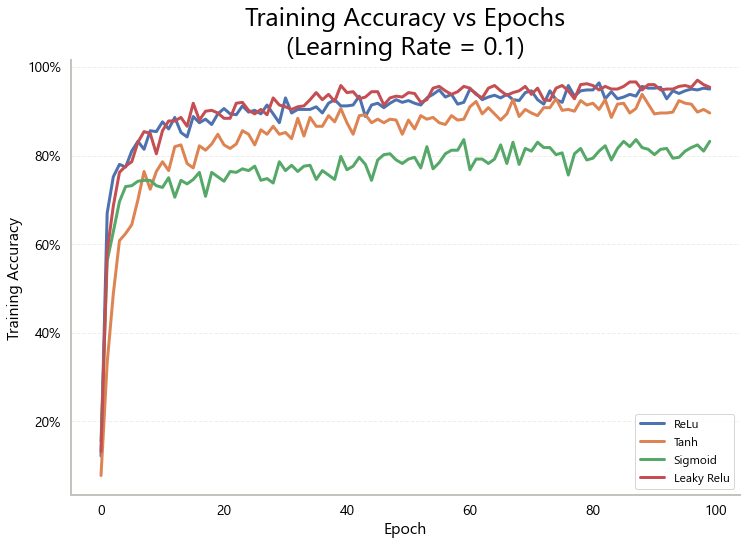

In [5]:
# Plotting Accuracy over Epochs

fig,ax = plt.subplots()
sns.lineplot(x = range(len(relu_acc)), y = relu_acc,label = 'ReLu')
sns.lineplot(x = range(len(tanh_acc)), y = tanh_acc, label = 'Tanh')
sns.lineplot(x = range(len(sigmoid_acc)), y = sigmoid_acc,label = 'Sigmoid')
sns.lineplot(x = range(len(leaky_relu_acc)), y = leaky_relu_acc,label = 'Leaky Relu')


plt.title(f'Training Accuracy vs Epochs\n(Learning Rate = {lr})')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
sns.despine(top = True, right = True, left = False, bottom = False)
ax.xaxis.grid(False)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1,decimals= 0))

## Code for Predicting Data and showing Image

In [53]:
# Predicting on Test Dataset
X_test_scaled = scaler.fit_transform(X_test)

test_accuracy = nn_leaky_relu.get_accuracy(nn_leaky_relu.predict(X_test_scaled),y_test)
train_accuracy =nn_leaky_relu.get_accuracy(nn_leaky_relu.predict(normalized_X),y_train)

print(f'Test Accuracy: {test_accuracy}\nTrain Accuracy: {train_accuracy}')

Test Accuracy: 0.8563095238095239
Train Accuracy: 0.8730059523809524


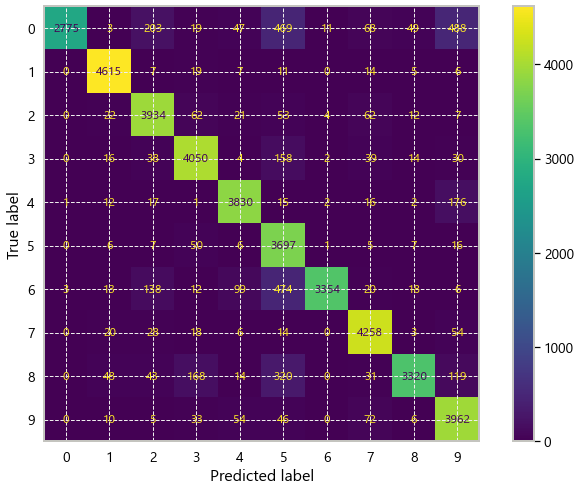

In [30]:
# Looking at confusion matrix to see where the Network is struggling. 
from sklearn import metrics

data = training_data_df.copy()
data['prediction_leaky_relu'] = nn_leaky_relu.predict(scaler.fit_transform(data.drop(columns = ['label']).to_numpy().T))

actual = data['label'].to_numpy()
predicted = data['prediction_leaky_relu']

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1,2,3,4,5,6,7,8,9])

cm_display.plot()
plt.show()

## Visualizing samples where network is wrong

Actual Label: 2
Actual Label: 3


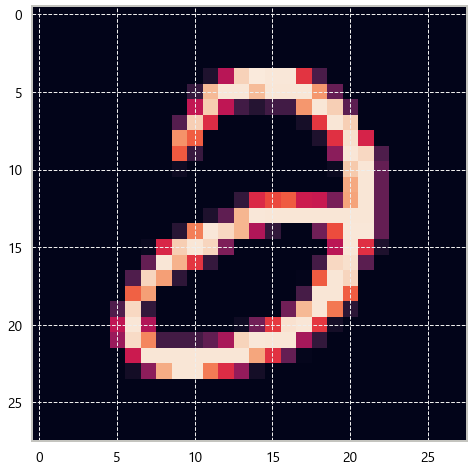

In [77]:
sample = data[data.prediction_leaky_relu != data.label].sample()

plt.imshow(sample.drop(columns = ['prediction_leaky_relu','label']).to_numpy().reshape(28,28))

print(f"Actual Label: {sample['label'].values[0]}")
print(f"Actual Label: {sample['prediction_leaky_relu'].values[0]}")



In [78]:
data[data.prediction_leaky_relu != data.label].label.value_counts(normalize = True)

0    0.322711
6    0.186207
8    0.176694
3    0.071581
2    0.057788
4    0.057551
9    0.053746
7    0.034007
5    0.023306
1    0.016409
Name: label, dtype: float64